## Step 0: requirements

In [1]:
! pip install -U accelerate
! pip install xformers
! pip install vaderSentiment
! pip install transformers
! pip install vaderSentiment
! pip install datasets
! pip install spacy
! pip install pyarrow
! pip install nltk
! python -m spacy download en_core_web_sm
! pip install gensim
! pip install ipywidgets
! pip install IPython

You should consider upgrading via the 'C:\Users\HP\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\HP\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\HP\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\HP\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\HP\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\HP\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\HP\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\HP\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\HP\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


     ---------------------------------------- 12.8/12.8 MB 8.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


You should consider upgrading via the 'C:\Users\HP\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\HP\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\HP\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\HP\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


In [2]:
import numpy as np 
import pandas as pd
import os
import en_core_web_sm
from datasets import load_dataset
from datasets import Dataset
from spacy import displacy
import spacy
import nltk
import pyarrow.compute as pc
import pyarrow as pa
import transformers 
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer
from gensim.models import KeyedVectors
import ipywidgets as widgets
from IPython.display import display, clear_output
import matplotlib.pyplot as plt
nlp = spacy.load("en_core_web_sm")

In [3]:
dataset = load_dataset("webis/tldr-17", split='train')

Found cached dataset tldr-17 (C:/Users/HP/.cache/huggingface/datasets/webis___tldr-17/default/1.0.0/bd1bf9097540c9101f329c123d12c6c6a042f65e5f0ab7f9bbabb0a54d3c840e)


### Step 1: check if any GPE mentioned

In [4]:
subset = dataset.select(range(200000)) # subset used due to long running time

In [6]:
def gpe_bool(example):
    doc = nlp(example['body'])
    for token in doc:
        if token.ent_type_ == "GPE":
            example['GPE'] = True
            return example
    example['GPE'] = False
    return example

In [7]:
with_gpe_bool = subset.map(gpe_bool)

Loading cached processed dataset at C:\Users\HP\.cache\huggingface\datasets\webis___tldr-17\default\1.0.0\bd1bf9097540c9101f329c123d12c6c6a042f65e5f0ab7f9bbabb0a54d3c840e\cache-3b5718d39a769a5d.arrow


In [8]:
with_gpe = with_gpe_bool.filter(lambda example: example['GPE']==True)

Loading cached processed dataset at C:\Users\HP\.cache\huggingface\datasets\webis___tldr-17\default\1.0.0\bd1bf9097540c9101f329c123d12c6c6a042f65e5f0ab7f9bbabb0a54d3c840e\cache-3af85b9ac7d03e03.arrow


### Step 2: Assign posts to categories

In [9]:
model = AutoModelForSeq2SeqLM.from_pretrained("google/flan-t5-base")
tokenizer = AutoTokenizer.from_pretrained("google/flan-t5-base")

In [10]:
def tester(input):
    input_full = f'I want to label texts. The available labels are: "Culinaric", "Landscape", "Culture", "Weather", "Safety", "None". Label the following text: {input}' 
    inputs = tokenizer(input_full, return_tensors="pt")
    outputs = model.generate(**inputs)
    return(tokenizer.batch_decode(outputs, skip_special_tokens=True))

def add_label(df):
    df['label'] = tester(df['body'])
    return df

In [11]:
with_label = with_gpe.map(add_label)

Loading cached processed dataset at C:\Users\HP\.cache\huggingface\datasets\webis___tldr-17\default\1.0.0\bd1bf9097540c9101f329c123d12c6c6a042f65e5f0ab7f9bbabb0a54d3c840e\cache-644ee6a162200223.arrow


In [12]:
label_list = ["Culinaric", "Landscape", "Culture", "Weather", "Safety"]

In [13]:
only_label = with_label.filter(lambda x: x['label'][0] in label_list)

Loading cached processed dataset at C:\Users\HP\.cache\huggingface\datasets\webis___tldr-17\default\1.0.0\bd1bf9097540c9101f329c123d12c6c6a042f65e5f0ab7f9bbabb0a54d3c840e\cache-f3dcee73727f1a48.arrow


### Step 3: Get country-specific city lists

In [14]:
! pip install openpyxl

You should consider upgrading via the 'C:\Users\HP\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


In [15]:
countries = pd.read_excel('data/CountryCode.xlsx') 
country_list = countries['Country'].tolist()
usa_uk = pd.read_excel('data/USA_UK.xlsx') 
usa = usa_uk['USA'].tolist()
uk = usa_uk['United Kingdom'].tolist()

In [16]:
country_list = country_list[1:] # Antigua and Barbuda
delete = ['Antigua and Barbuda', 'Bosnia and Herzegovina', 'Burkina Faso', 
         "Côte d'Ivoire", 'Cabo Verde', 'Central African Republic', 'Costa Rica',
         'Dominican Republic', 'El Salvador', 'Equatorial Guinea', 'Eswatini',
         'Guinea-Bissau', 'Holy See', 'Marshall Islands', 'New Zealand', 'North Korea',
         'North Macedonia', 'Palestine State', 'Papua New Guinea', 'Saint Lucia',
         'San Marino', 'Saudi Arabia', 'Sierra Leone', 'Solomon Islands', 'South Africa',
         'South Korea', 'South Sudan', 'Sri Lanka', 'Trinidad and Tobago', 'United Arab Emirates',
         'United Kingdom', 'United States of America']
for c in delete:
    country_list.remove(c)

In [17]:
model = KeyedVectors.load_word2vec_format('data/GoogleNews-vectors-negative300.bin.gz', binary=True)

In [18]:
def has_entity_type(text, list_of_country):
    text_words = set(text.lower().split())
    for word in text_words:
        if word in list_of_country:
            return True
    return False

def country_bool(df):
    for country, words in country_dict.items():
        df[country] = has_entity_type(df['body'], words)
    return df

def country_dict(country_list):
    my_dict = {}
    for country in country_list:
        examples = ["country - country + city"]
        my_dict[country] = []
        
        for example in examples:
            words = example.split() 
            c_list = model.most_similar(positive=[country, words[4]], negative=words[2], topn=1000)
        c_list = [word.lower() for word, _ in c_list]
        c_list.append(country.lower())
        my_dict[country] = c_list
    
    return my_dict

In [19]:
usa = [word.lower() for word in usa]
uk = [word.lower() for word in uk]

In [20]:
country_dict = country_dict(country_list)
country_dict['United Kingdom'] = uk
country_dict['USA'] = usa

### Step 4: Assign posts to countries

In [21]:
country_df = only_label.map(country_bool)

Loading cached processed dataset at C:\Users\HP\.cache\huggingface\datasets\webis___tldr-17\default\1.0.0\bd1bf9097540c9101f329c123d12c6c6a042f65e5f0ab7f9bbabb0a54d3c840e\cache-f739a44b9128e192.arrow


In [22]:
def drop_rows_with_no_true(dataset, columns):
    new_rows = []
    for row in dataset:
        if any(row[col] for col in columns):
            new_rows.append(row)
    dataframe = pa.Table.from_pandas(pd.DataFrame(new_rows))
    return Dataset.from_pandas(dataframe.to_pandas())

In [23]:
country_df_short = drop_rows_with_no_true(country_df, country_list)

### Step 5: Check post sentiment

In [24]:
analyzer = SentimentIntensityAnalyzer()
def vader_sentiment(df):
    df['vader'] = analyzer.polarity_scores(df['body'])['compound']
    return df

In [25]:
df = country_df_short.map(vader_sentiment)

Map:   0%|          | 0/12 [00:00<?, ? examples/s]

### Step 6: Create final scores

In [26]:
df = df.map(lambda example: {**example, 'label': example['label'][0]})
country_list = df.column_names[10:-1]
cat_list = ['Culinaric', 'Safety', 'Culture', 'Landscape', 'Weather']

Map:   0%|          | 0/12 [00:00<?, ? examples/s]

In [27]:
df = pd.DataFrame(df)

In [28]:
final_df = pd.DataFrame(index = country_list)
for cat in cat_list:
    final_df[cat] = np.zeros(len(country_list))
for cou in country_list:
    for cat in cat_list:
        if np.isnan(df[(df[cou]==True) & (df['label']==cat)]['vader'].mean()):
            final_df.loc[cou, cat] = 0
        else:
            final_df.loc[cou, cat] = df[(df[cou]==True) & (df['label']==cat)]['vader'].mean()

In [29]:
def wr(rating):
    wr = {}
    for k in rating.keys():
        wr[k] = rating[k] / sum(rating.values())
    return wr

In [30]:
def get_scores(rating):
    weigthed_rating = wr(rating)
    scores = {}
    for cou in country_list:
        score = 0
        for cat in cat_list:
            score += (final_df.loc[cou, cat] * weigthed_rating[cat])
        scores[cou] = score
    return scores

### Step 7: Display final results

In [31]:
rating = {}

def give_score(score, key):
    rating[key[:-1]] = score

# Create the sliders using interact
safety_slider = widgets.IntSlider(min=1, max=5, step=1, value=1, description='Safety:')
culture_slider = widgets.IntSlider(min=1, max=5, step=1, value=1, description='Culture:')
culinaric_slider = widgets.IntSlider(min=1, max=5, step=1, value=1, description='Culinaric:')
landscape_slider = widgets.IntSlider(min=1, max=5, step=1, value=1, description='Landscape:')
weather_slider = widgets.IntSlider(min=1, max=5, step=1, value=1, description='Weather:')

widgets.interact(give_score, score=safety_slider, key=widgets.fixed(safety_slider.description))
widgets.interact(give_score, score=culture_slider, key=widgets.fixed(culture_slider.description))
widgets.interact(give_score, score=culinaric_slider, key=widgets.fixed(culinaric_slider.description))
widgets.interact(give_score, score=landscape_slider, key=widgets.fixed(landscape_slider.description))
widgets.interact(give_score, score=weather_slider, key=widgets.fixed(weather_slider.description))

# Display the widget
display()

interactive(children=(IntSlider(value=1, description='Safety:', max=5, min=1), Output()), _dom_classes=('widge…

interactive(children=(IntSlider(value=1, description='Culture:', max=5, min=1), Output()), _dom_classes=('widg…

interactive(children=(IntSlider(value=1, description='Culinaric:', max=5, min=1), Output()), _dom_classes=('wi…

interactive(children=(IntSlider(value=1, description='Landscape:', max=5, min=1), Output()), _dom_classes=('wi…

interactive(children=(IntSlider(value=1, description='Weather:', max=5, min=1), Output()), _dom_classes=('widg…

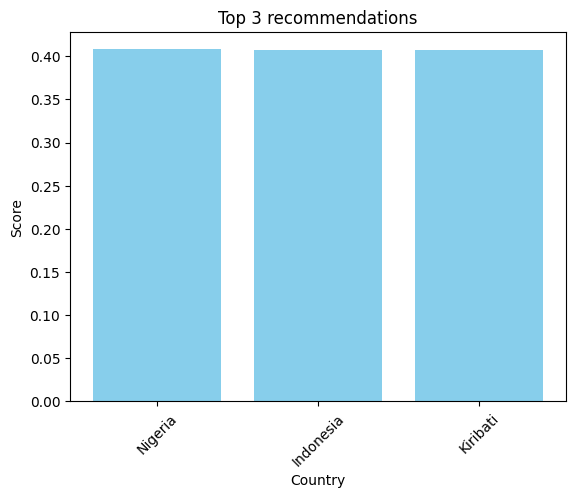

In [33]:
# after giving the scores, run this cell to get recommendations
my_dict = get_scores(rating)
sorted_dict = sorted(my_dict.items(), key=lambda item: item[1], reverse = True)
data = sorted_dict[:3]
labels = [item[0] for item in data]
values = [item[1] for item in data]
plt.bar(labels, values, color='skyblue')
plt.xlabel('Country')
plt.ylabel('Score')
plt.title('Top 3 recommendations')
plt.xticks(rotation=45)
plt.show()